In [1]:
from tensorflow.keras.datasets import imdb
(train_data,train_label),(test_data,test_label) = imdb.load_data(num_words=1000)

17473536/17464789 [==============================] - 0s 0us/step


In [16]:
word_index = imdb.get_word_index()
reverse_word_index = dict([ (value,key) for (key,value) in word_index.items()])
decode_word = " ".join([ reverse_word_index.get(i-3,"?")  for i in train_data[0]])

In [17]:
decode_word

"? this film was just brilliant casting ? ? story direction ? really ? the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same ? ? as myself so i loved the fact there was a real ? with this film the ? ? throughout the film were great it was just brilliant so much that i ? the film as soon as it was released for ? and would recommend it to everyone to watch and the ? ? was amazing really ? at the end it was so sad and you know what they say if you ? at a film it must have been good and this definitely was also ? to the two little ? that played the ? of ? and paul they were just brilliant children are often left out of the ? ? i think because the stars that play them all ? up are such a big ? for the whole film but these children are amazing and should be ? for what they have done don't you think the whole story was so ? because it was true and was ? life after all that was ? with us all"

In [18]:
import numpy as np

def vectorize_input(sequences,demension=10000):
    result = np.zeros((len(sequences),demension))
    for i,sequence in enumerate(sequences):
          for j in sequence:
                result[i,j]=1
    return result 

x_train = vectorize_input(train_data)
x_test = vectorize_input(test_data)

In [21]:
y_train_label = np.asarray(train_label).astype("float32")
y_test_label = np.asarray(test_label).astype("float32")

In [24]:
from tensorflow import keras 
from keras import layers
model = keras.Sequential([
      layers.Dense(16,activation="relu"),
      layers.Dense(16,activation="relu"),
      layers.Dense(1,activation="sigmoid")                                          
])

In [37]:
model.compile(optimizer="rmsprop",
loss="binary_crossentropy",
metrics=["accuracy"])

In [38]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train_label[:10000]
partial_y_train = y_train_label[10000:]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [43]:
history = model.fit(partial_x_train,partial_y_train,batch_size=512,epochs=4,validation_data=(x_val,y_val))

Epoch 1/4
30/30 [==============================] - 1s 46ms/step - loss: 0.2605 - accuracy: 0.8917 - val_loss: 0.3489 - val_accuracy: 0.8560
Epoch 2/4
30/30 [==============================] - 1s 34ms/step - loss: 0.2551 - accuracy: 0.8920 - val_loss: 0.3579 - val_accuracy: 0.8522
Epoch 3/4
30/30 [==============================] - 1s 34ms/step - loss: 0.2493 - accuracy: 0.8950 - val_loss: 0.3836 - val_accuracy: 0.8405
Epoch 4/4
30/30 [==============================] - 1s 34ms/step - loss: 0.2469 - accuracy: 0.8961 - val_loss: 0.3532 - val_accuracy: 0.8555


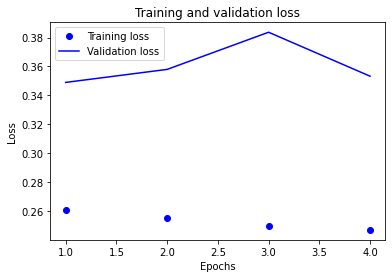

In [44]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss") 
plt.plot(epochs, val_loss_values, "b", label="Validation loss") 
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

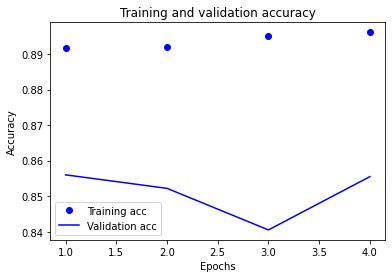

In [45]:
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [49]:
results = model.evaluate(x_test,y_test_label) 

782/782 [==============================] - 2s 2ms/step - loss: 0.3522 - accuracy: 0.8516


In [51]:
model.predict(x_test)

array([[0.30716565],
       [0.9974013 ],
       [0.82753897],
       ...,
       [0.08147565],
       [0.11673743],
       [0.612033  ]], dtype=float32)